In [13]:
from complex_iterate import iterate_complex
import numpy as np
import matplotlib.pyplot as plt
from lorenz_system import lorenz

Text(0.5, 1.0, 'Bounded (white) vs Diverging (black) regions')

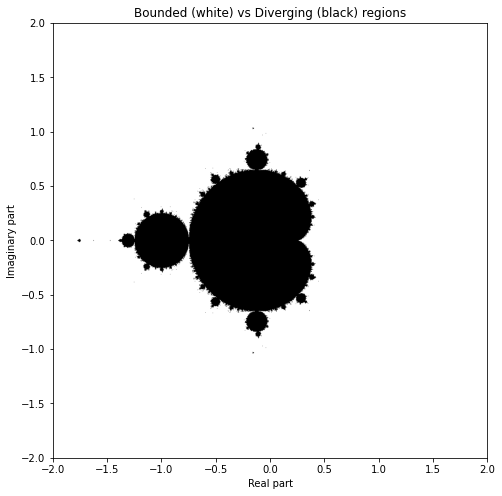

In [14]:
# Question 1

res = 1000  # resolution
x = np.linspace(-2, 2, res)
y = np.linspace(-2, 2, res)
img = np.zeros((res, res))

for i in range(res):
    for j in range(res):
        c = complex(x[j], y[i])  # x = real, y = imaginary
        iter_count = iterate_complex(c, max_iter=100)
        img[i, j] = 1 if iter_count == 100 else 0  # 1 = bounded, 0 = diverged

# Plot
plt.figure(figsize=(8, 8))
plt.imshow(img, extent=[-2, 2, -2, 2], cmap='binary')
plt.xlabel('Real part')
plt.ylabel('Imaginary part')
plt.title('Bounded (white) vs Diverging (black) regions')

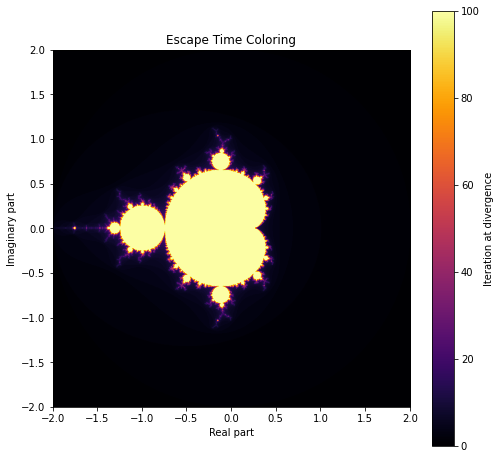

In [15]:
img2 = np.zeros((res, res))

for i in range(res):
    for j in range(res):
        c = complex(x[j], y[i])
        iter_count = iterate_complex(c, max_iter=100)
        img2[i, j] = iter_count

# Plot
plt.figure(figsize=(8, 8))
plt.imshow(img2, extent=[-2, 2, -2, 2], cmap='inferno')
plt.xlabel('Real part')
plt.ylabel('Imaginary part')
plt.title('Escape Time Coloring')
plt.colorbar(label='Iteration at divergence')
plt.savefig("escape_time_plot.pdf", bbox_inches="tight")

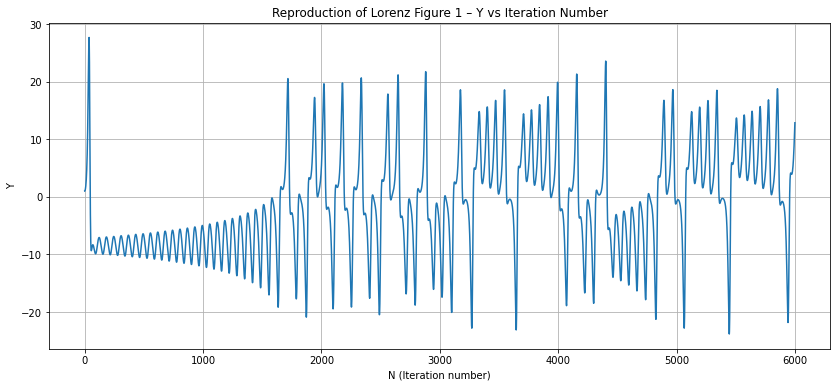

In [16]:
# Question 2

from scipy.integrate import solve_ivp
import numpy as np

# Time span and time evaluation points
t_span = (0, 60)
t_eval = np.linspace(0, 60, 6000)  # very fine resolution (dt ≈ 0.01)

# Initial conditions
W0 = [0.0, 1.0, 0.0]

# Solve the Lorenz system using imported lorenz function
sol = solve_ivp(lorenz, t_span, W0, t_eval=t_eval)

dt = 0.01
N = sol.t / dt  # Convert time to iteration count

plt.figure(figsize=(14, 6))
plt.plot(N, sol.y[1])  # Use Y, not X
plt.xlabel("N (Iteration number)")
plt.ylabel("Y")
plt.title("Reproduction of Lorenz Figure 1 – Y vs Iteration Number")
plt.grid(True)
plt.savefig("lorenz_y_vs_iter.pdf", bbox_inches="tight")

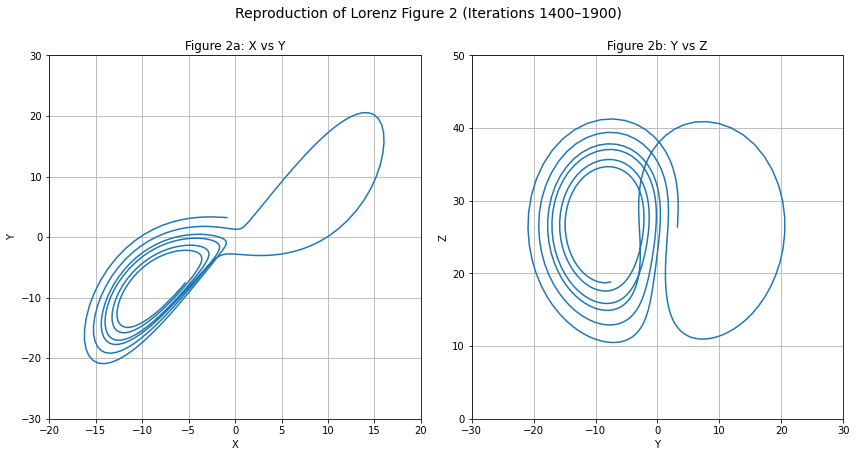

In [17]:
# 1. Convert time to iteration numbers (N = t / 0.01)
dt = 0.01
N = sol.t / dt  # Gives you array of iteration indices

# 2. Find the indices corresponding to N = 1400 to 1900
start_idx = np.searchsorted(N, 1400)
end_idx = np.searchsorted(N, 1900)

# 3. Slice Y and Z values for that range
X_seg = sol.y[0, start_idx:end_idx]
Y_seg = sol.y[1, start_idx:end_idx]
Z_seg = sol.y[2, start_idx:end_idx]

# 4. Plot both subplots using the sliced data
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# X vs Y
axs[0].plot(X_seg, Y_seg)
axs[0].set_xlabel("X")
axs[0].set_ylabel("Y")
axs[0].set_title("Figure 2a: X vs Y")
axs[0].grid(True)
axs[0].set_xlim([-20, 20])  # Centered axes (adjust if needed)
axs[0].set_ylim([-30, 30])

# Y vs Z
axs[1].plot(Y_seg, Z_seg)
axs[1].set_xlabel("Y")
axs[1].set_ylabel("Z")
axs[1].set_title("Figure 2b: Y vs Z")
axs[1].grid(True)
axs[1].set_xlim([-30, 30])
axs[1].set_ylim([0, 50])  # Based on typical Z range in Lorenz system

plt.tight_layout()
plt.suptitle("Reproduction of Lorenz Figure 2 (Iterations 1400–1900)", fontsize=14, y=1.05)
plt.savefig("lorenz_y_vs_z.pdf", bbox_inches="tight")

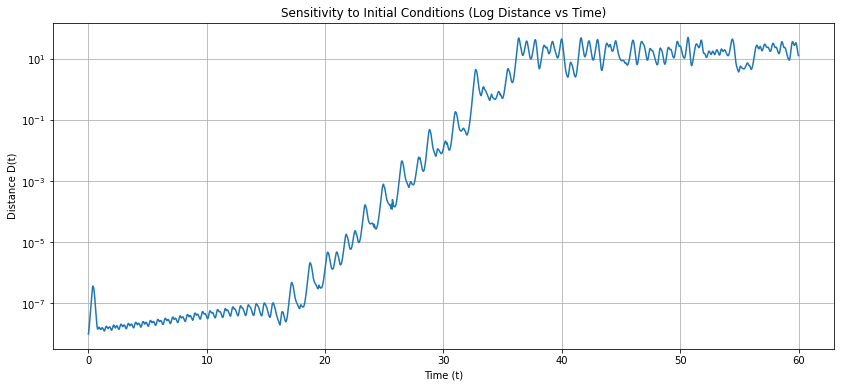

In [18]:
# Perturbed initial condition
W0_perturbed = [0.0, 1.00000001, 0.0]

# Solve again over same time and evaluation points
sol_perturbed = solve_ivp(
    lorenz,
    t_span=(0, 60),
    y0=W0_perturbed,
    t_eval=sol.t,  # Match time steps exactly
)

# Compute differences
diff = sol.y - sol_perturbed.y
dist = np.linalg.norm(diff, axis=0)  # Compute Euclidean norm at each timestep

import matplotlib.pyplot as plt

plt.figure(figsize=(14, 6))
plt.semilogy(sol.t, dist)
plt.xlabel("Time (t)")
plt.ylabel("Distance D(t)")
plt.title("Sensitivity to Initial Conditions (Log Distance vs Time)")
plt.grid(True)
plt.savefig("lorenz_log_distance.pdf", bbox_inches="tight")